In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
LEGO_all       = pd.read_csv("LEGO.csv")
LEGO = LEGO_all[LEGO_all["date"] == LEGO_all["date"].max()]

TH         = pd.read_csv("TH-Aschaffenburg.csv")
TH_Faecher = pd.read_csv("TH-Aschaffenburg_Faecher.csv")

tips       = pd.read_csv("tips.csv")

## LEGO

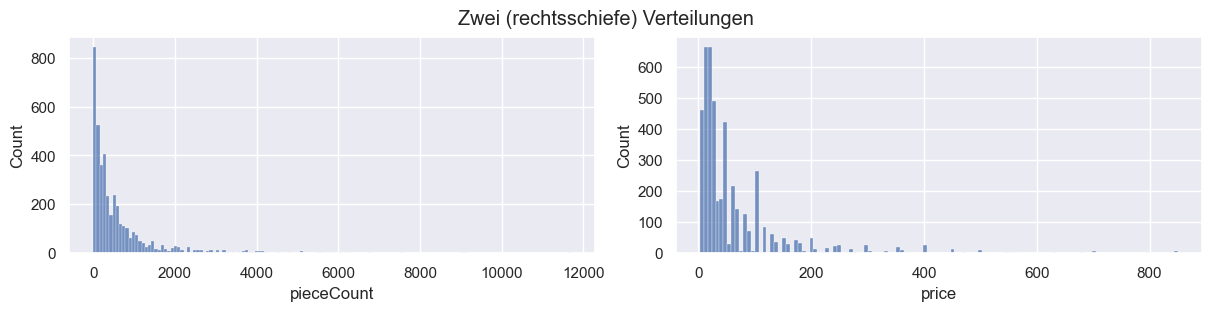

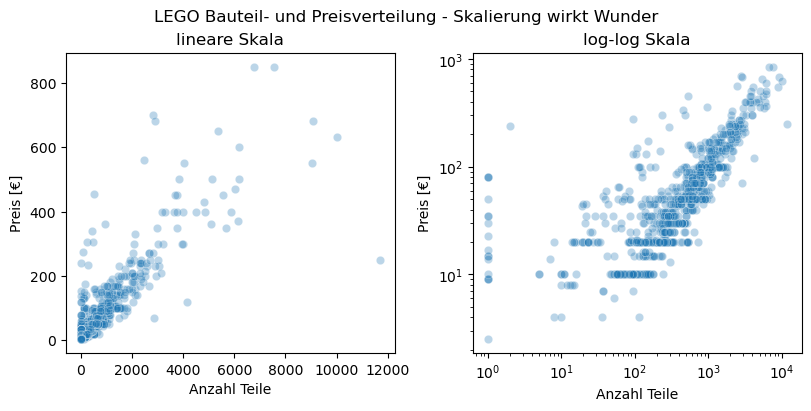

## TH Aschaffenburg

,Jahr,Fach,Anfänger,Studierende,year,Abkürzung,Langname,Fakultät
249,WS 22/23,M,41.0,216.0,2022,M,Mechatronik,IW
248,WS 22/23,MKD,41.0,185.0,2022,MKD,Multimediale Kommunikation und Dokumentation,IW
259,WS 22/23,WI,41.0,183.0,2022,WI,Wirtschaftsingenieurwesen,IW
258,WS 22/23,SD,64.0,138.0,2022,SD,Software Design,IW
247,WS 22/23,ITV,18.0,129.0,2022,ITV,Internationales Technisches Vertriebsmanagement,IW


c:\Users\e01169\AppData\Local\miniconda3\envs\Gdl_Data_Science\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


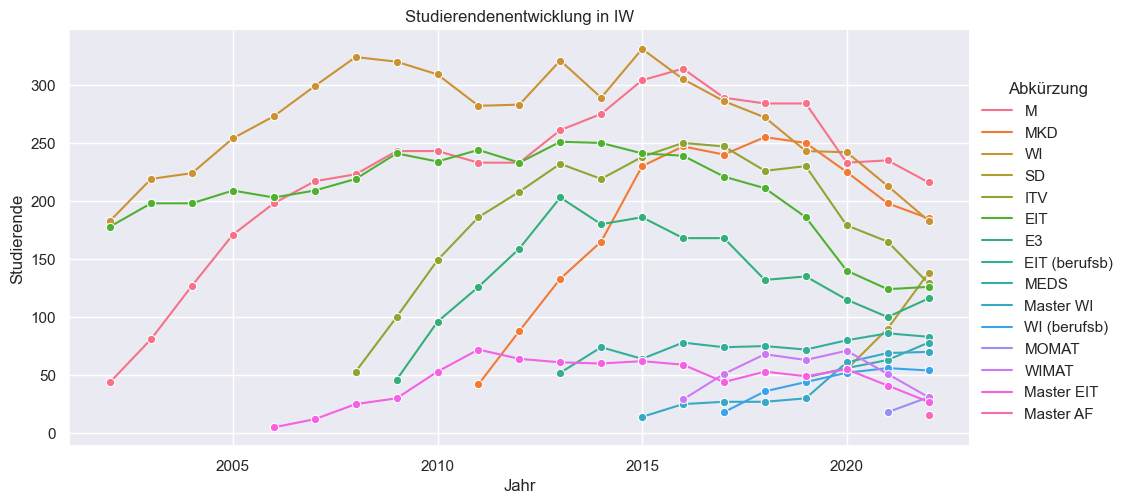

## Trinkgelder

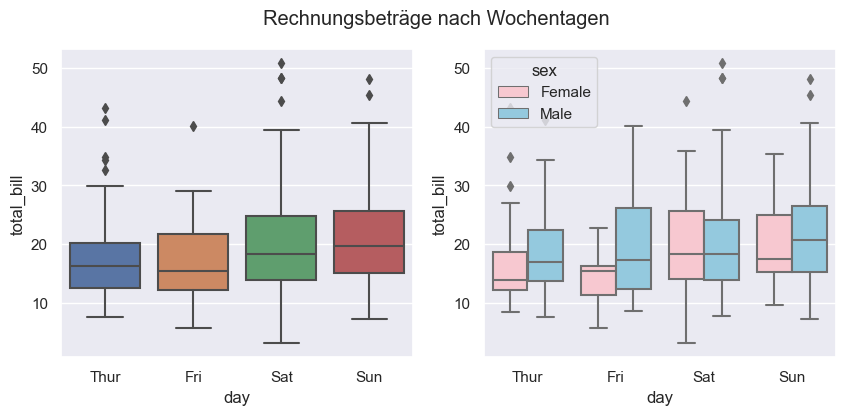